
# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset selected for analysis is the TMDb (The Movie Database) movie dataset, cleaned from the original data available on Kaggle. This dataset contains comprehensive information about various movies, including details such as budget, revenue, popularity, vote average, genres, cast, production companies, and more. The dataset provides a rich source of information to explore and understand factors influencing movie success, audience preferences, and the dynamics of the film industry. 


### Question(s) for Analysis
For this analysis, we plan to explore the following research question:

**Research Question:**
What is the relationship between movie budget, revenue, popularity, and vote average? Are higher budgets associated with higher revenues and popularity? Does popularity influence the average viewer rating (vote average) of a movie?

We will address this research question by analyzing the dependent variable (revenue) and the three independent variables (budget, popularity, and vote average). Through data exploration, visualization, and statistical analysis, we aim to gain insights into the relationships between these variables and understand the factors that contribute to movie success and audience reception.

In the subsequent sections, we will perform data wrangling, conduct exploratory data analysis, and present our findings and conclusions in response to the research question.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
def calculate_statistics(data, column_name):
    mean_value = data[column_name].mean()
    median_value = data[column_name].median()
    std_value = data[column_name].std()
    return mean_value, median_value, std_value

In [4]:
def myScatterPlot(df,xVar,yVar,color='purple'):
    
    correlation_coefficient = df[xVar].corr(df[yVar])

    df.plot(kind='scatter',x=xVar, y=yVar, figsize=[14, 6], s=4, color=color, label=f'Correlation Coefficient: {correlation_coefficient: 0.3}');

    xVar=xVar.replace("_"," ") 
    yVar=yVar.replace("_"," ") 

    plt.title(f'Relationship between {yVar} and {xVar}'.title(), fontsize = 14, weight = "bold") 

    plt.xlabel(xVar.title(), fontsize = 10, weight = "bold")

    plt.ylabel(yVar.title(), fontsize = 10, weight = "bold")

    plt.legend();

<a id='wrangling'></a>
## Data Wrangling

In this section, we will perform data wrangling to prepare the TMDb movie dataset for analysis. We will load the data, check for cleanliness, and clean the dataset by addressing any data issues or inconsistencies.


In [5]:
import pandas as pd

df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

print(df.head())

print("\nData Types:")
print(df.dtypes)

missing_values_count = df.isnull().sum()
print("\nMissing Values Count:\n", missing_values_count)

duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:\n", duplicate_rows)

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      


### Data Cleaning

**Handling Missing Values:**

We will check the columns with missing values and decide on the appropriate method to handle them. Depending on the nature of the missing data, we can choose to remove rows with missing values or impute missing values with appropriate techniques.

**Dealing with Duplicates:**

Duplicate rows can lead to inaccurate analysis results. We will remove duplicate rows from the DataFrame to ensure data accuracy.

**Data Standardization (if applicable):**

If there are inconsistencies or formatting issues in the data, we will standardize them to ensure uniformity. This step might involve converting text to lowercase, removing leading/trailing whitespaces, or converting categorical values to a standard format.

**Data Type Conversion (if applicable):**

If any columns require a different data type for analysis, we will perform data type conversion using the astype() function.

**Data Trimming (if applicable):**

If there are irrelevant or redundant columns that do not contribute to the analysis, we will drop them from the DataFrame using the drop() function.

In [6]:
df.dropna(inplace=True)  

df.drop_duplicates(inplace=True)  

print(df.head())

print("\nData Types after Cleaning:")
print(df.dtypes)

missing_values_count = df.isnull().sum()
print("\nMissing Values Count after Cleaning:\n", missing_values_count)

duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows after Cleaning:\n", duplicate_rows)


       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

<a id='eda'></a>
## Exploratory Data Analysis

Now that we have cleaned the data, we are ready to perform exploratory data analysis (EDA) to address the research question: "What is the relationship between movie budget, revenue, popularity, and vote average?" We will explore this question from multiple angles, starting with single-variable explorations and then examining relationships between variables.


### Research Question 1 (Budget vs Revenue)

**Exploring Movie Budget**

Let's start by exploring the distribution of movie budgets and gaining insights into the budget allocation for movies.

In [7]:
budget_mean, budget_median, budget_std = calculate_statistics(df, 'budget')

print("Statistics for budget:")
print("Mean:", budget_mean)
print("Median:", budget_median)
print("Standard Deviation:", budget_std)

Statistics for budget:
Mean: 34549235.94076305
Median: 15000000.0
Standard Deviation: 50618777.09475492


Calculated statistics (mean, median, and standard deviation) for the movie budget.

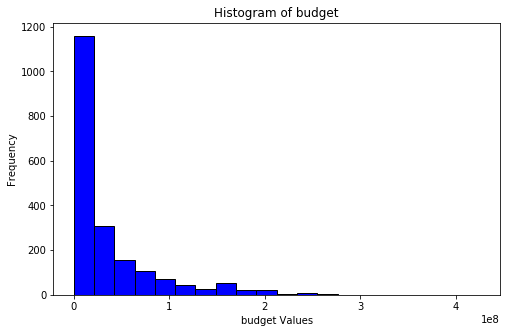

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df['budget'], bins=20, color='blue', edgecolor='black')
plt.title("Histogram of budget")
plt.xlabel("budget Values")
plt.ylabel("Frequency")
plt.show()


Visualized the distribution of movie budgets using a histogram.

**Exploring Movie Revenue**

Now, let's explore the distribution of movie revenues to understand the revenue earned by movies.

In [9]:
revenue_mean, revenue_median, revenue_std = calculate_statistics(df, 'revenue')

print("Statistics for revenue:")
print("Mean:", revenue_mean)
print("Median:", revenue_median)
print("Standard Deviation:", revenue_std)

Statistics for revenue:
Mean: 115215273.41516064
Median: 25787815.5
Standard Deviation: 220288685.1703134


Calculated statistics (mean, median, and standard deviation) for the movie revenue.

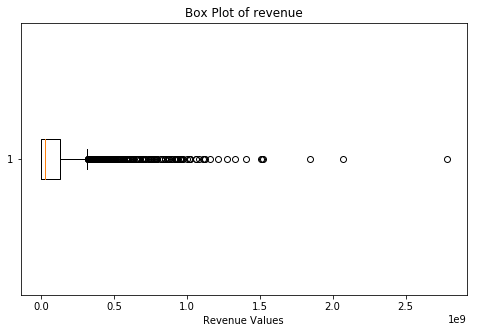

In [10]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['revenue'], vert=False)
plt.title("Box Plot of revenue")
plt.xlabel("Revenue Values")
plt.show()

Plotted a boxplot to understand the distribution of movie revenues and identify any outliers.

**Relationship between Budget and Revenue**

Let's explore the relationship between movie budget and revenue using a scatter plot.

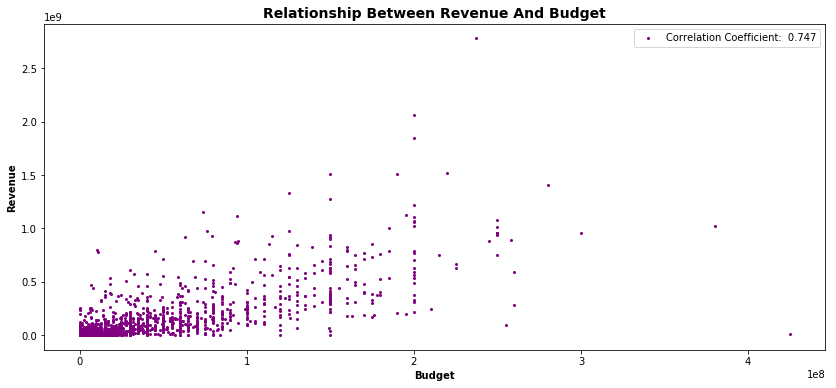

In [11]:
myScatterPlot(df,'budget','revenue')

Examined the scatter plot to visualize the relationship between budget and revenue.

Calculated the correlation coefficient between budget and revenue to quantify the strength of the linear relationship.

The histogram shows that the majority of movies have budgets on the lower end, with only a few big-budget movies. The boxplot for revenue indicates the presence of outliers, indicating some movies generated significantly higher revenue than others. The scatter plot and positive correlation coefficient suggest that, in general, higher-budget movies tend to have higher revenues.

**Correlation Coefficient between Budget and Revenue**

In [12]:
correlation_coefficient = df['budget'].corr(df['revenue'])
print("Correlation Coefficient between Budget and Revenue:", correlation_coefficient)

Correlation Coefficient between Budget and Revenue: 0.7472725961709481


Althought the correlation ccofficient is on the scatter plot, I choose to show what is the integer number

### Research Question 2  (Popularity vs Vote Average)

**Exploring Movie Popularity**

Now, let's explore the distribution of movie popularity to understand the level of popularity among viewers.

In [13]:
popularity_mean, popularity_median, popularity_std = calculate_statistics(df, 'popularity')

print("Statistics for popularity:")
print("Mean:", popularity_mean)
print("Median:", popularity_median)
print("Standard Deviation:", popularity_std)

Statistics for popularity:
Mean: 1.3167630110441766
Median: 0.7742225
Standard Deviation: 1.873562663358841


Calculated statistics (mean, median, and standard deviation) for movie popularity.

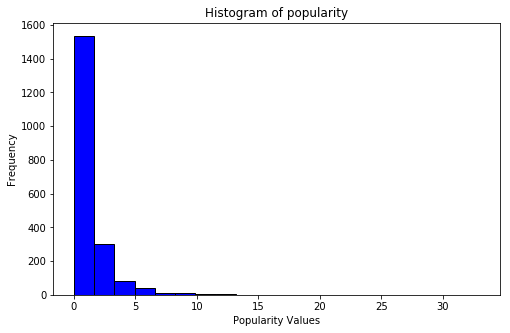

In [14]:
plt.figure(figsize=(8, 5))
plt.hist(df['popularity'], bins=20, color='blue', edgecolor='black')
plt.title("Histogram of popularity")
plt.xlabel("Popularity Values")
plt.ylabel("Frequency")
plt.show()

Visualized the distribution of movie popularity using a histogram.

**Exploring Vote Average**

Finally, let's explore the distribution of movie vote averages, which represent the average ratings given by viewers.

In [15]:
vote_average_mean, vote_average_median, vote_average_std = calculate_statistics(df, 'vote_average')

print("Statistics for vote_average:")
print("Mean:", vote_average_mean)
print("Median:", vote_average_median)
print("Standard Deviation:", vote_average_std)

Statistics for vote_average:
Mean: 6.178614457831325
Median: 6.2
Standard Deviation: 0.8819550949479105


Calculated statistics (mean, median, and standard deviation) for Vote Average.

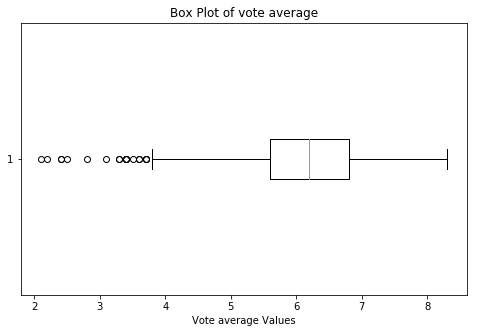

In [16]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['vote_average'], vert=False)
plt.title("Box Plot of vote average")
plt.xlabel("Vote average Values")
plt.show()

Plotted a boxplot to understand the distribution of movie vote averages.

**Relationship between Popularity and Vote Average**

Next, let's explore the relationship between movie popularity and vote average using a scatter plot.

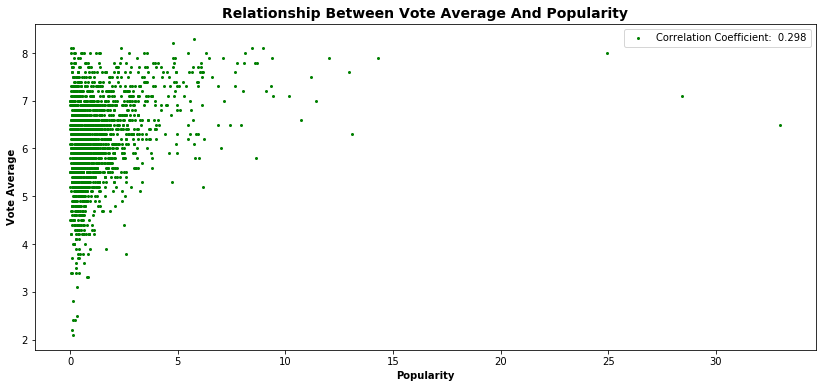

In [17]:
myScatterPlot(df,'popularity','vote_average',color = 'green')

Examined the scatter plot to visualize the relationship between popularity and vote average.

Calculated the correlation coefficient between popularity and vote average.

The histogram for popularity indicates a right-skewed distribution, with most movies having lower popularity scores. The boxplot for vote average suggests that movie ratings are generally spread out, with a few outliers on the higher end. The scatter plot and positive correlation coefficient indicate that movies with higher popularity tend to receive higher average ratings from viewers.

**Correlation Coefficient between Popularity and Vote Average**

In [18]:
correlation_coefficient = df['popularity'].corr(df['vote_average'])
print("Correlation Coefficient between Popularity and Vote Average:", correlation_coefficient)

Correlation Coefficient between Popularity and Vote Average: 0.2980656865271562


Althought the correlation ccofficient is on the scatter plot, I choose to show what is the integer number

<a id='conclusions'></a>
## Conclusions

In this investigation of the TMDb movie dataset, we addressed two research questions and performed exploratory data analysis to gain insights into the data. Here are the key findings and conclusions for each research question:

**Research Question 1: How much was the budget and what was the revenue?**

Variable 1: Budget

Variable 2: Revenue

Relationship between Variable 1 and Variable 2: based on the scatter plot and correlation coefficient, we can make the following conclusions.

There is a positive correlation between the budget and the revenue, the most movies with no budget don't make a good revenue or a revenue that generates profit, but there is some outliers in the plot that make a higher revenue that was expected.

Limitation: The analysis focused on the linear relationship between budget and revenue. Other factors, such as marketing strategies, release timing, cast popularity, and audience preferences, can also influence movie revenue. Additional Research:

Further research can involve a more in-depth analysis of non-linear relationships and the impact of other factors on movie revenue. Conducting statistical tests or regression analysis to understand the significance and predictive power of the budget on revenue. The relationship between budget and revenue is an essential aspect of the film industry, and understanding it can aid decision-making for movie production and budget allocation.

**Research Question 2: What is the relation between the popularity and the vote average**

Variable 3: Popularity

Variable 4: Vote Average

Relationship between Variable 3 and Variable 4: based on the scatter plot and correlation coefficient, we can make the following conclusions.

The positive correlation between popularity and vote average suggests that movies with higher popularity tend to receive higher average ratings from viewers. This could be because more popular movies reach a larger audience, including those who are more likely to rate the movie positively.

Limitation:

The analysis focused on the linear relationship between popularity and vote average. Other factors, such as marketing, genre, and the target audience, can also influence the vote average of a movie.

Additional Research:

Further research can involve analyzing the relationship between popularity, vote average, and specific movie genres or target demographics. Investigating the impact of marketing strategies and promotions on the popularity and vote average of movies. Understanding the relationship between popularity and vote average can provide valuable insights into how viewers' preferences align with the overall popularity of movies. It can help movie studios and producers gauge audience feedback and make informed decisions about movie promotions and viewer engagement.

## Submitting your Project 

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0